# Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

# Load the dataset
In this case we shall use the famous fashion MNIST dataset to demonstrate noise reduction using Autoencoder

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Since this dataset was originally designed for classification task so it has label values corresponding to each image but in this case we don't need those label values.

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

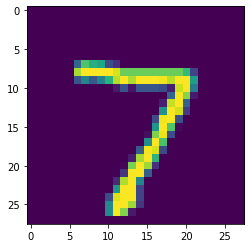

In [4]:
plt.imshow(tf.squeeze(X_test[0]))

In [5]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [6]:
type(X_train)

numpy.ndarray

In [7]:
print(X_train.shape)

(60000, 28, 28)


In [8]:
X_train = X_train[...,np.newaxis]
X_test = X_test[...,np.newaxis]

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
X_train_noisy = X_train + tf.random.normal(shape=X_train.shape) * 0.4
X_test_noisy = X_test + tf.random.normal(shape=X_test.shape) * 0.4

In [11]:
X_train_noisy = tf.clip_by_value(X_train_noisy, clip_value_min=0., clip_value_max=1.) 
X_test_noisy = tf.clip_by_value(X_test_noisy, clip_value_min=0., clip_value_max=1.)

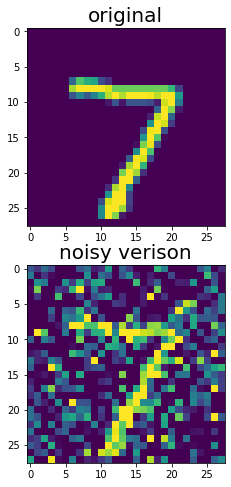

In [12]:
plt.figure(figsize=(20, 8))
ax = plt.subplot(2, 1, 1) 
plt.title("original", size=20) 
plt.imshow(tf.squeeze(X_test[0])) # here we will have to use tf.squeeze since we need to squeeze 28*28*1 to 28*28 
bx = plt.subplot(2, 1, 2) 
plt.title("noisy verison", size=20) 
plt.imshow(tf.squeeze(X_test_noisy[0])) 
plt.show()

In [34]:
class Autoencoder(tf.keras.Model): 
  def __init__(self):

    super(Autoencoder, self).__init__() 

    self.encoder = tf.keras.Sequential()
    self.encoder.add(Input(shape=(28, 28, 1)))
    self.encoder.add(Conv2D(8, (3,3), activation='relu', padding='same', strides=2)) 
    self.encoder.add(Conv2D(4, (3,3), activation='relu', padding='same', strides=2)) 
    
    self.decoder = tf.keras.Sequential()
    self.decoder.add(Conv2DTranspose(4, kernel_size=3, strides=2, activation='relu', padding='same'))
    self.decoder.add(Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same')) 
    self.decoder.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))
    
  def call(self, x): 
    encoded = self.encoder(x) 
    decoded = self.decoder(encoded) 
    return decoded

In [35]:
model = Autoencoder()

In [36]:
input_shape = (28,28,1)
model.build(input_shape) 

In [37]:
model.summary()

Model: "autoencoder_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 7, 7, 4)           372       
                                                                 
 sequential_7 (Sequential)   (28, 28, 4, 1)            517       
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='mse')

In [39]:
model.fit(X_train_noisy, X_train, epochs=6, shuffle=True, validation_data=(X_test_noisy, X_test))

Epoch 1/6
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0285 - val_loss: 0.0123
Epoch 2/6
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 3/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 4/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 5/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 6/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0108 - val_loss: 0.0105


In [43]:
encoded_imgs=model.encoder(X_test).numpy()
decoded_imgs=model.decoder(encoded_imgs)

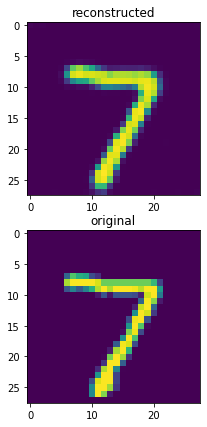

In [44]:
plt.figure(figsize=(20, 7))
cx = plt.subplot(2, 1, 1) 
plt.title("reconstructed") 
plt.imshow(tf.squeeze(decoded_imgs[0])) 
ax = plt.subplot(2,1,2) 
plt.title("original") 
plt.imshow(tf.squeeze(X_test[0])) 

In [45]:
encoded_imgs=model.encoder(X_test).numpy()
decoded_imgs=model.decoder(encoded_imgs)

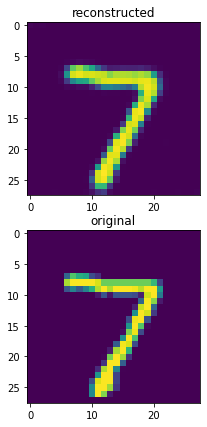

In [46]:
plt.figure(figsize=(20, 7))
cx = plt.subplot(2, 1, 1) 
plt.title("reconstructed") 
plt.imshow(tf.squeeze(decoded_imgs[0])) 
ax = plt.subplot(2, 1, 2) 
plt.title("original") 
plt.imshow(tf.squeeze(X_test[0])) 